LIBRARIES

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

LOADING IN FILE

In [24]:
df = pd.read_csv('C:/Users/lijaz/Desktop/DATA/Anemia/anemia_dataset.csv')

EXPLORE

In [25]:
df.shape

(104, 14)

In [26]:
df.head()

,Number,Name,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,Jafor Alam,43.2555,30.8421,25.9025,6.3,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,khadiza,45.6033,28.1900,26.2067,13.5,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Lalu,45.0107,28.9677,26.0215,11.7,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Mira nath,44.5398,28.9899,26.4703,13.5,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,monoara,43.2870,30.6972,26.0158,12.4,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Selecting only the needed columns

In [27]:
needed = ['Number','Name','%Red Pixel','%Green pixel','%Blue pixel','Hb','Anaemic']
data = df[needed]
data.head()

,Number,Name,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,Jafor Alam,43.2555,30.8421,25.9025,6.3,Yes
1,2,khadiza,45.6033,28.1900,26.2067,13.5,No
2,3,Lalu,45.0107,28.9677,26.0215,11.7,No
3,4,Mira nath,44.5398,28.9899,26.4703,13.5,No
4,5,monoara,43.2870,30.6972,26.0158,12.4,No


CLEAN THE DATA

In [28]:
data.duplicated().sum()
data.isna().sum()

Number          0
Name            0
%Red Pixel      0
%Green pixel    0
%Blue pixel     0
Hb              0
Anaemic         0
dtype: int64

Change Yes or No to binary 1 or 0

In [29]:
data['Anaemic'] = data['Anaemic'].replace({'Yes':1,'No':0})

C:\Users\lijaz\AppData\Local\Temp\ipykernel_12944\2577831617.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Anaemic'] = data['Anaemic'].replace({'Yes':1,'No':0})
C:\Users\lijaz\AppData\Local\Temp\ipykernel_12944\2577831617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Anaemic'] = data['Anaemic'].replace({'Yes':1,'No':0})


In [30]:
data.head()

,Number,Name,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,Jafor Alam,43.2555,30.8421,25.9025,6.3,1
1,2,khadiza,45.6033,28.1900,26.2067,13.5,0
2,3,Lalu,45.0107,28.9677,26.0215,11.7,0
3,4,Mira nath,44.5398,28.9899,26.4703,13.5,0
4,5,monoara,43.2870,30.6972,26.0158,12.4,0


CHECKING FOR PREDICTION MODELS

In [31]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [32]:
x = data[['%Red Pixel','%Green pixel','%Blue pixel','Hb']]
y = data[['Anaemic']]

train test splitting

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Checking model score

In [34]:
ln = linear_model.LinearRegression()

ln.fit(x_train,y_train)

LinearRegression()

In [35]:
score = ln.score(x_train,y_train)
print(score)

0.5611017824817834


LINEAR REGRESSION not a good fit

trying logistic regression

In [36]:
lg = linear_model.LogisticRegression()

lg.fit(x_train,y_train)

c:\Users\lijaz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [37]:
score = lg.score(x_train,y_train)
print(score)

0.963855421686747


In [38]:
coe = lg.coef_
print(coe)

[[ 0.02517446  0.63454846 -0.15074783 -1.52366254]]


In [39]:

predictions = lg.predict(x_test)
print(predictions)



[0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0]


In [40]:
from sklearn.metrics import classification_report

report = classification_report(y_test,predictions)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         5

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



Relation of variables to prediction

In [41]:
coe = lg.coef_[0]
cols = x.columns

<Axes: ylabel='None'>

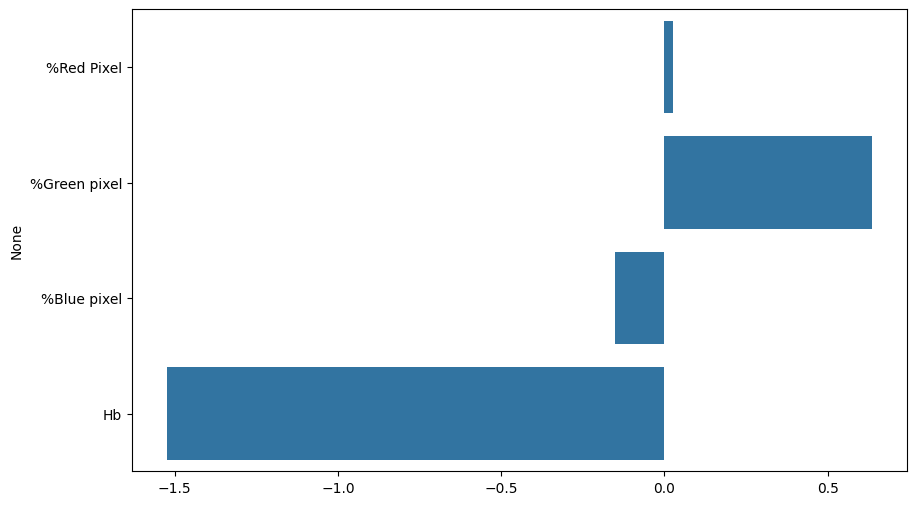

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(x=coe, y=cols)

Confusion matrix

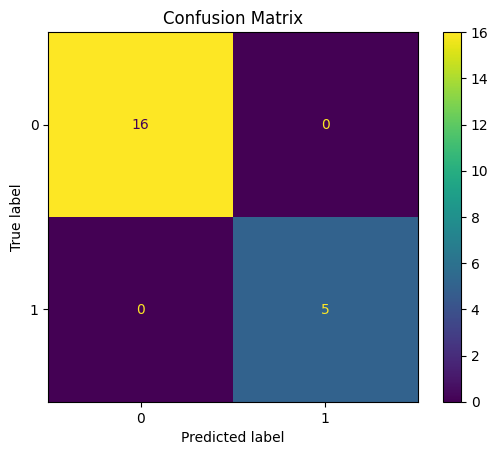

In [43]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

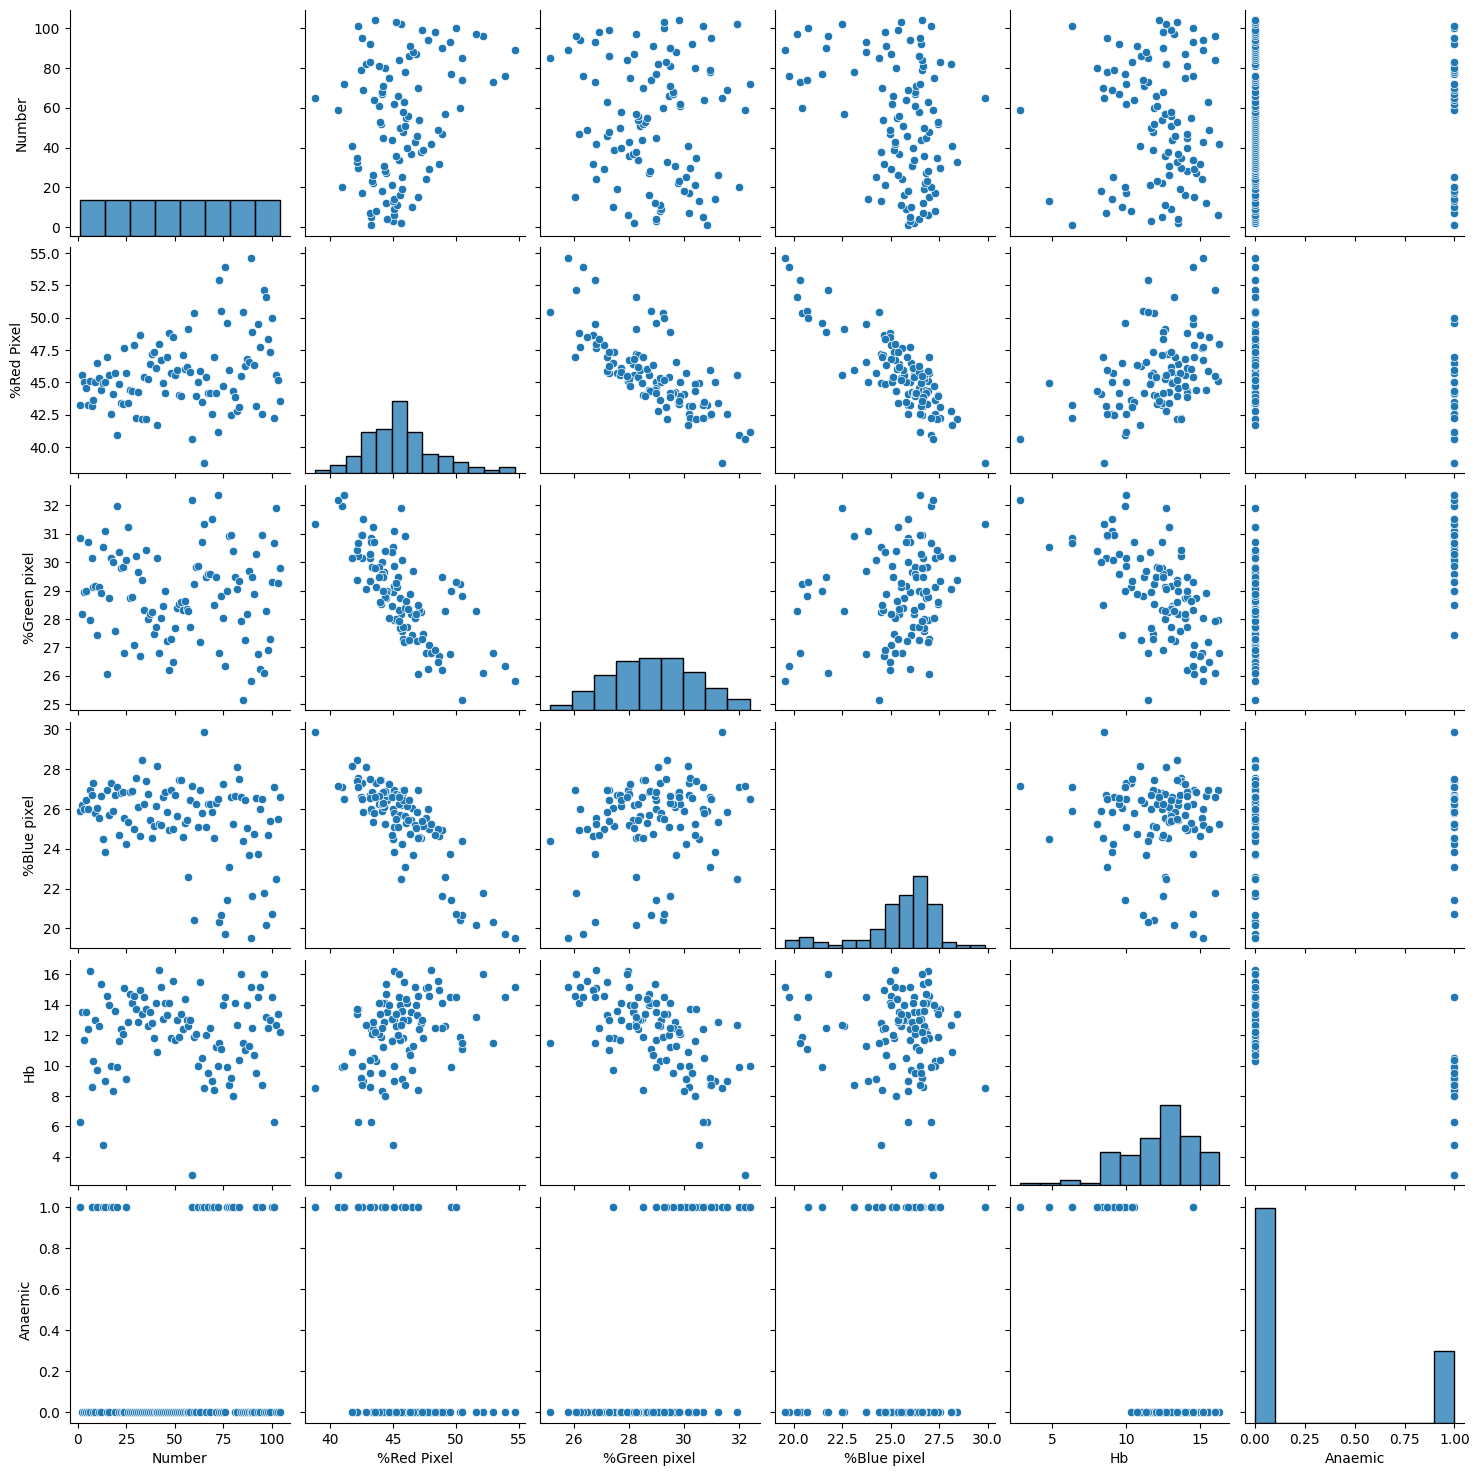

In [44]:
sns.pairplot(data)

In [46]:
from sklearn import ensemble

In [47]:
tr = ensemble.RandomForestClassifier()
tr.fit(x_train,y_train)
score = tr.score(x_train,y_train)
print(score)

1.0


c:\Users\lijaz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [48]:
predictions = tr.predict(x_test)
print(predictions)
report = classification_report(y_test,predictions)
print(report)

[0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         5

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

